#Lectura y procesamiento de los resultados de los mejores modelos GRU

En el presente archivo se leen los archivos excel que contienen resumenes de los modelos generados con las grillas de GRU. Se procesa dicha información para encontrar los mejores modelos.

In [1]:
# Access files from your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
cd gdrive/MyDrive/Universidad/2020/Tesis_final/problema2/leer_procesar_modelos_NARX/results/

/content/gdrive/MyDrive/Universidad/2020/Tesis_final/problema2/leer_procesar_modelos_NARX/results


In [3]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model

summaryModelsGRU1S = pd.read_excel('grilla_GRU_NARX_1STEPS.xlsx', header=0)
summaryModelsGRU2S = pd.read_excel('grilla_GRU_NARX_2STEPS.xlsx', header=0)
summaryModelsGRU3S = pd.read_excel('grilla_GRU_NARX_3STEPS.xlsx', header=0)
summaryModelsGRU4S = pd.read_excel('grilla_GRU_NARX_4STEPS.xlsx', header=0)

grilla_GRU_NARX_AQP = pd.concat([summaryModelsGRU1S, summaryModelsGRU2S], ignore_index=True)
grilla_GRU_NARX_AQP = pd.concat([grilla_GRU_NARX_AQP, summaryModelsGRU3S], ignore_index=True)
grilla_GRU_NARX_AQP = pd.concat([grilla_GRU_NARX_AQP, summaryModelsGRU4S], ignore_index=True)

grilla_GRU_NARX_AQP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MAPE                    384 non-null    float64
 1   delayedSteps            384 non-null    int64  
 2   nameModel               384 non-null    object 
 3   nameHistory             384 non-null    object 
 4   nameConfiguration       384 non-null    object 
 5   timeTrain (in seconds)  384 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.1+ KB


##La cantidad de modelos generados para el LSTM NARX de DDFO fue de 384

In [4]:
rslt_df = grilla_GRU_NARX_AQP.sort_values('MAPE')
total = grilla_GRU_NARX_AQP['timeTrain (in seconds)'].sum()
print("Tiempo total: " + str(total))
grilla_GRU_NARX_AQP.describe()

Tiempo total: 61711.659999999996


MAPE  delayedSteps  timeTrain (in seconds)
count  384.000000    384.000000              384.000000
mean    79.372469      2.500000              160.707448
std     32.784081      1.119493               20.794827
min     16.075447      1.000000               72.850000
25%     46.106945      1.750000              147.797500
50%     99.627476      2.500000              154.430000
75%     99.631529      3.250000              165.282500
max    100.000000      4.000000              222.500000

##La cantidad de segundos totales para ejecutar la grilla es aproximadamente 61711, lo que equivale a 17 horas aproximadamente. Además se tienen las estadisticas resumen.

In [5]:
rslt_df.iloc[:45,:]

MAPE  ...  timeTrain (in seconds)
252  16.075447  ...                  162.22
139  16.349980  ...                  144.72
144  16.743701  ...                  155.52
25   16.914981  ...                  146.25
7    16.942297  ...                  145.22
163  17.094594  ...                  152.40
37   17.172186  ...                  142.33
348  17.179618  ...                  167.72
306  17.445694  ...                  153.15
355  17.764000  ...                  168.66
162  18.260739  ...                  157.06
313  18.303962  ...                  161.32
6    18.306586  ...                  140.97
138  18.379445  ...                  147.20
133  18.402713  ...                  148.29
121  18.531953  ...                  151.24
24   18.576765  ...                  145.96
115  18.636273  ...                  145.91
145  19.262816  ...                  155.47
18   19.375824  ...                  143.78
217  19.814407  ...                  154.78
175  19.816466  ...                  176.76
36   19.992069  ...                  141.55
354  20.110954  ...                  165.92
61   20.491954  ...                  148.12
103  20.506367  ...                  144.99
283  20.659704  ...                  198.47
372  20.718478  ...                  220.85
151  20.881415  ...                  152.95
312  20.910502  ...                  161.48
157  20.995019  ...                  151.97
120  21.110913  ...                  150.26
156  21.113786  ...                  152.26
319  21.139618  ...                  153.96
102  21.175445  ...                  146.07
127  21.190701  ...                  144.67
336  21.233799  ...                  171.04
43   21.436261  ...                  144.98
49   21.655857  ...                  149.18
330  21.703539  ...                  156.30
42   21.729958  ...                  144.02
265  21.838936  ...                  198.50
325  21.846642  ...                  155.79
241  21.971459  ...                  162.83
132  22.131773  ...                  145.84

[45 rows x 6 columns]

In [6]:
rslt_df.iloc[1,:]

MAPE                                                                  16.35
delayedSteps                                                              2
nameModel                 results/GRU_213_1_64_sigmoid_tanh_relu_mean_ab...
nameHistory               results/GRU_213_1_64_sigmoid_tanh_relu_mean_ab...
nameConfiguration         results/GRU_213_1_64_sigmoid_tanh_relu_mean_ab...
timeTrain (in seconds)                                               144.72
Name: 139, dtype: object

##Por principio de parsimonia, se decide trabajar con un modelo que genera un MAPE de 16.3, pero que tiene pocos retardos, especificamente 2 retardo.

In [7]:
bestModel = rslt_df.iloc[1,:]
print(bestModel)

MAPE                                                                  16.35
delayedSteps                                                              2
nameModel                 results/GRU_213_1_64_sigmoid_tanh_relu_mean_ab...
nameHistory               results/GRU_213_1_64_sigmoid_tanh_relu_mean_ab...
nameConfiguration         results/GRU_213_1_64_sigmoid_tanh_relu_mean_ab...
timeTrain (in seconds)                                               144.72
Name: 139, dtype: object


In [8]:
print(bestModel['nameHistory'])
print(bestModel['nameConfiguration'])
print(bestModel['nameModel'])

results/GRU_213_1_64_sigmoid_tanh_relu_mean_absolute_error_2S_history.npy
results/GRU_213_1_64_sigmoid_tanh_relu_mean_absolute_error_2S_config.npy
results/GRU_213_1_64_sigmoid_tanh_relu_mean_absolute_error_2S.h5


In [9]:
print(bestModel['nameHistory'].split("/")[1])
print(bestModel['nameConfiguration'].split("/")[1])
print(bestModel['nameModel'].split("/")[1])

GRU_213_1_64_sigmoid_tanh_relu_mean_absolute_error_2S_history.npy
GRU_213_1_64_sigmoid_tanh_relu_mean_absolute_error_2S_config.npy
GRU_213_1_64_sigmoid_tanh_relu_mean_absolute_error_2S.h5


In [10]:
#para recuperar history
history=np.load(bestModel['nameHistory'].split("/")[1],allow_pickle='TRUE').item()
print(history)

#para recuperar configDict
config=np.load(bestModel['nameConfiguration'].split("/")[1],allow_pickle='TRUE').item()
print(config)

# para recuperar el modelo
saved_model = load_model(bestModel['nameModel'].split("/")[1])
print(saved_model.summary())
print(saved_model.layers[2].get_config())

{'loss': [302.4198913574219, 302.2575378417969, 302.08856201171875, 301.9118957519531, 301.7206726074219, 301.51611328125, 301.2927551269531, 301.046630859375, 300.77471923828125, 300.4830017089844, 300.1628112792969, 299.8199768066406, 299.4494323730469, 299.0550231933594, 298.6416931152344, 298.2103576660156, 297.7694396972656, 297.31658935546875, 296.85870361328125, 296.3978576660156, 295.9425354003906, 295.490966796875, 295.04803466796875, 294.61163330078125, 294.1893310546875, 293.776611328125, 293.3757629394531, 292.9859313964844, 292.607177734375, 292.2380676269531, 291.8819580078125, 291.5303955078125, 291.19189453125, 290.8638610839844, 290.53955078125, 290.2243347167969, 289.91656494140625, 289.6123046875, 289.3144836425781, 289.0195007324219, 288.7277526855469, 288.4395446777344, 288.151611328125, 287.8691101074219, 287.5840148925781, 287.30230712890625, 287.0227966308594, 286.74169921875, 286.46258544921875, 286.1864929199219, 285.9053039550781, 285.6288757324219, 285.35153

In [11]:
def cargarData1():
  trainDFScaled = pd.read_csv('data/trainDF_std.csv', header=0)
  testDFScaled = pd.read_csv('data/testDF_std.csv', header=0)
  trainDF = pd.read_csv('data/trainDF.csv', header=0)
  testDF = pd.read_csv('data/testDF.csv', header=0)
  return trainDFScaled, testDFScaled, trainDF, testDF


# calculate the error between an actual and predicted value
def mae(actual, predicted):
	# calculate abs difference
	return abs(actual - predicted)
 
def mape(actual,pred):
  return np.mean(np.abs((actual - pred) / actual)) * 100

def evaluate_forecasts(predictions, testData):
  total_mae = 0.0
  total_mape = 0.0
  total_c = 0
  for i in range(len(predictions)):
    real = testData[i]
    predicted = predictions[i]
    # calculate error
    error_mae = mae(real, predicted)
    error_mape = mape(real, predicted)
    # update statistics
    total_mae += error_mae
    total_mape += error_mape
    total_c += 1
  # normalize summed absolute errors
  total_mae /= total_c
  total_mape /= total_c
  return total_mae, total_mape


def generateSupervisedData(data, delays, predictionHorizon, columnTarget = 12):
  X = list()
  y = list()
  cantidadFilas = data.shape[0]
  indexAux = 0
  indexTarget = 0
  for _, row in data.iterrows():
    end_row = indexAux + delays
    indexTarget = end_row - 1 + predictionHorizon
    if indexTarget <= cantidadFilas-1:
      salidaAux = data.iloc[indexTarget, columnTarget]
      xAux = data.iloc[indexAux:end_row, :].values
      #print(xAux.shape)
      #print(xAux)
      X.append(xAux)
      y.append(salidaAux)
      #print(salidaAux)
    indexAux = indexAux + 1
  X = np.array(X)
  y = np.array(y)
  return X, y

def generateFinalData(delays, predictionHorizon, trainDFScaled, testDFScaled, trainDF, testDF):
  trainXScaled, trainYScaled = generateSupervisedData(trainDFScaled, delays, predictionHorizon)
  testXScaled, testYScaled = generateSupervisedData(testDFScaled, delays, predictionHorizon)
  trainX, trainY = generateSupervisedData(trainDF, delays, predictionHorizon)
  testX, testY = generateSupervisedData(testDF, delays, predictionHorizon)
  #print("trainXScaled.shape: ", str(trainXScaled.shape))
  #print("trainYScaled.shape: ", str(trainYScaled.shape))
  #print("testXScaled.shape: ", str(testXScaled.shape))
  #print("testYScaled.shape: ", str(testYScaled.shape))
  #print("trainX.shape: ", str(trainX.shape))
  #print("trainY.shape: ", str(trainY.shape))
  #print("testX.shape: ", str(testX.shape))
  #print("testY.shape: ", str(testY.shape))
  return trainXScaled, trainY, testXScaled, testY


def plotErrors(historyModel):
  fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
  fig.suptitle('Errors')
  ax1.plot(historyModel['mean_squared_error'], label='mse')
  ax1.plot(historyModel['val_mean_squared_error'], label='val_mse')
  ax1.legend()

  ax2.plot(historyModel['root_mean_squared_error'], label='rmse')
  ax2.plot(historyModel['val_root_mean_squared_error'], label='val_rmse')
  ax2.legend()

  ax3.plot(historyModel['mean_absolute_error'], label='mae')
  ax3.plot(historyModel['val_mean_absolute_error'], label='val_mae')
  ax3.legend()

  ax4.plot(historyModel['mean_absolute_percentage_error'], label='mape')
  ax4.plot(historyModel['val_mean_absolute_percentage_error'], label='val_mape')
  ax4.legend()

def plotLoss(historyModel):
  fig, ax = plt.subplots(1, 1)
  ax.plot(historyModel['loss'], label='loss')
  ax.plot(historyModel['val_loss'], label='val_loss')
  ax.legend()


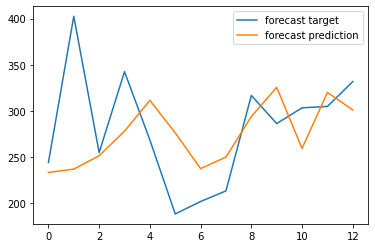

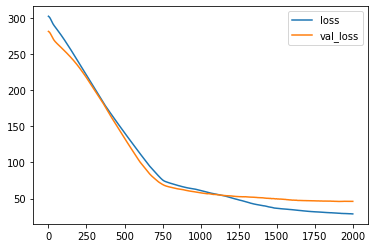

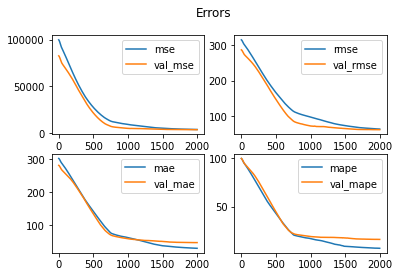

In [12]:
trainDFScaled, testDFScaled, trainDF, testDF = cargarData1()
trainXScaled, trainY, testXScaled, testY = generateFinalData(bestModel['delayedSteps'], 1, trainDFScaled, testDFScaled, trainDF, testDF)
#trainXScaled, testXScaled = reshapeXdata(trainXScaled, testXScaled)
validation_target = testY[:]
validation_predictions = saved_model.predict(testXScaled[:,:])
fig, ax = plt.subplots(1, 1)
ax.plot(validation_target, label='forecast target')
ax.plot(validation_predictions, label='forecast prediction')
ax.legend()

plotLoss(history)
plotErrors(history)

##Generar data para NARMAX

In [13]:
def generateNarmaxData(dataScaled, data, delays, predictionHorizon, saved_model, columnTarget = 12):
  #Se hace una copia de los datos de entrada y agrega una columna con NA para los errores
  dataNarmax = data.copy()
  dataNarmax["error"] = np.nan
  dataNarmaxScaled = dataScaled.copy()
  dataNarmaxScaled["error"] = np.nan

  cantidadFilas = data.shape[0]
  indexAux = 0
  indexTarget = 0
  for _, row in data.iterrows():
    end_row = indexAux + delays
    indexTarget = end_row - 1 + predictionHorizon
    if indexTarget <= cantidadFilas-1:
      salidaAux = data.iloc[indexTarget, columnTarget]
      xAux = data.iloc[indexAux:end_row, :].values
      xAux = xAux.reshape(1,xAux.shape[0],xAux.shape[1])
      prediction = float(saved_model.predict(xAux))
      error = mape(salidaAux, prediction)
      dataNarmax.iloc[indexTarget, columnTarget+1] = error
      dataNarmaxScaled.iloc[indexTarget, columnTarget+1] = error
    indexAux = indexAux + 1
  dataNarmax = dataNarmax.dropna()
  dataNarmaxScaled = dataNarmaxScaled.dropna()
  return dataNarmax, dataNarmaxScaled

In [14]:
dataTrainNarmax, dataTrainNarmaxScaled = generateNarmaxData(trainDFScaled, trainDF, bestModel['delayedSteps'], 1, saved_model)
dataTestNarmax, dataTestNarmaxScaled = generateNarmaxData(testDFScaled, testDF, bestModel['delayedSteps'], 1, saved_model)

In [15]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()

dataTrainNarmaxScaled[['error']] = std_scaler.fit_transform(dataTrainNarmaxScaled[['error']])
dataTestNarmaxScaled[['error']] = std_scaler.fit_transform(dataTestNarmaxScaled[['error']])

In [16]:
dataTrainNarmax.to_csv('dataTrainNarmaxGRU.csv', index = False)
dataTrainNarmaxScaled.to_csv('dataTrainNarmaxScaledGRU.csv', index = False)
dataTestNarmax.to_csv('dataTestNarmaxGRU.csv', index = False)
dataTestNarmaxScaled.to_csv('dataTestNarmaxScaledGRU.csv', index = False)

In [17]:
dataTrainNarmax.iloc[:10,[0,1,12,13]]

Week_of_the_month  Day_of_the_week  Target_(Total_orders)       error
2                 1.0              6.0                129.412  100.000000
3                 2.0              2.0                317.120   97.757581
4                 2.0              3.0                210.517  100.000000
5                 2.0              4.0                207.364   78.157308
6                 2.0              5.0                263.043   87.052091
7                 2.0              6.0                248.958   94.707983
8                 3.0              2.0                344.291   94.651075
9                 3.0              3.0                248.428   94.746461
10                3.0              4.0                281.420  100.000000
11                3.0              5.0                243.568  100.000000